In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)        
%matplotlib inline

In [ ]:
for dirname,_,filenames in os.walk('C:/Users/Lee Jong Ann/Desktop/Celebrity'):
    for filename in filenames: 
        print(os.path.join(dirname,filename))


In [3]:

import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
import cv2
import os
import random
import tensorflow as tf

Using TensorFlow backend.
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lee Jong Ann\a

In [19]:
labels = ['suzi','moonchaewon','jangnara','boyoung','Naeon','emma','jenny']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                cvt_img_arr = cv2.cvtColor(img_arr,cv2.COLOR_RGB2BGR)
                resized_arr = cv2.resize(cvt_img_arr, (img_size, img_size))# Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [23]:
data = get_data("C:/Users/Lee Jong Ann/Desktop/Celebrity")

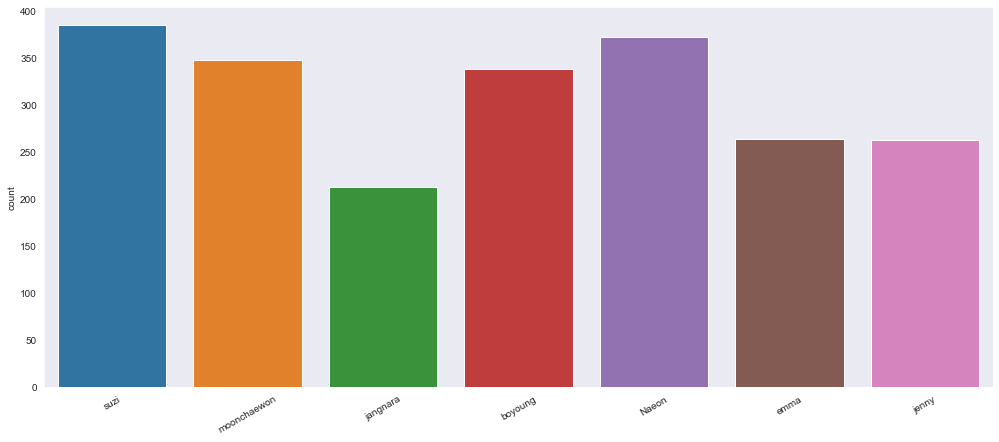

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(17,7)

l = []
for i in data: 
    l.append(labels[i[1]])  
sns.set_style('dark')
plt.sca(ax)
plt.xticks(rotation=30)
sns.countplot(l,ax=ax)

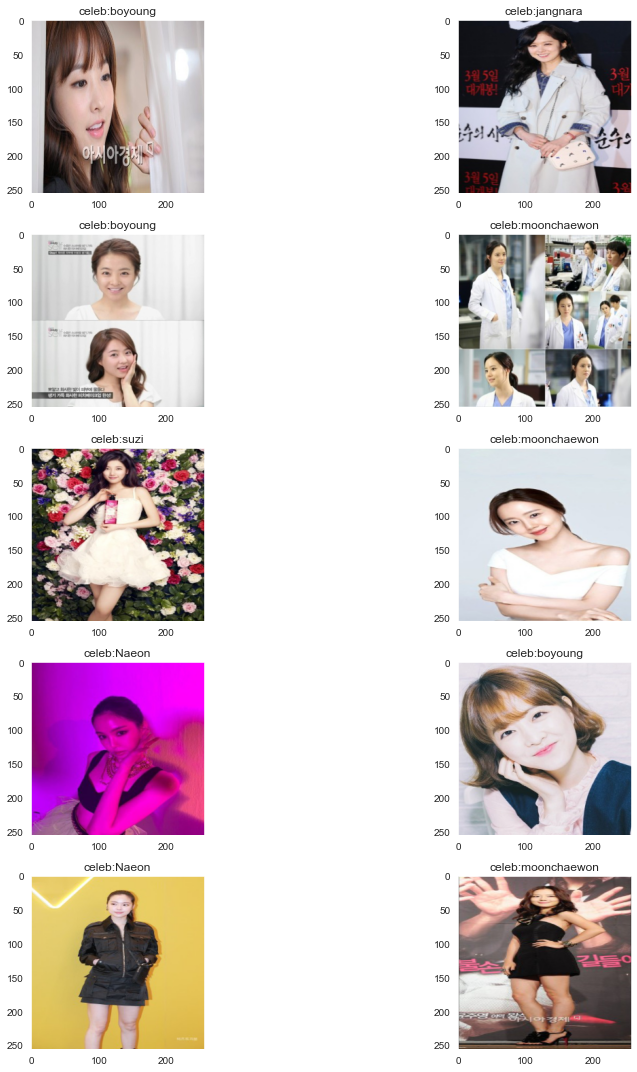

In [25]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('celeb:'+labels[data[l][1]])
        
plt.tight_layout()

In [29]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [30]:
# Normalize the data
x = np.array(x) / 255

In [31]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [32]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [38]:
pre_trained_model = VGG19(input_shape=(256,256,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = True

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(7, activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 8, 8, 512)         20024384  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 57351     
Total params: 20,081,735
Trainable params: 4,776,967
Non-trainable params: 15,304,768
_________________________________________________________________


In [47]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.6, min_lr=0.1)

In [48]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 10 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Train on 1746 samples, validate on 437 samples
Epoch 1/10
1746/1746 [==============================] - 25s 14ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9184 - val_accuracy: 0.1831
Epoch 2/10
1746/1746 [==============================] - 25s 14ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9183 - val_accuracy: 0.1831
Epoch 3/10
1746/1746 [==============================] - 26s 15ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9183 - val_accuracy: 0.1831
Epoch 4/10
1746/1746 [==============================] - 25s 14ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9183 - val_accuracy: 0.1831
Epoch 5/10
1746/1746 [==============================] - 25s 14ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9183 - val_accuracy: 0.1831
Epoch 6/10
1746/1746 [==============================] - 25s 14ms/step - loss: 1.9296 - accuracy: 0.1747 - val_loss: 1.9183 - val_accuracy: 0.1831
Epoch 7/10
1746/1746 [==============================] - 25s 15ms/step - loss:

In [49]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

437/437 [==============================] - 5s 11ms/step
Loss of the model is -  1.9182807062528773
437/437 [==============================] - 5s 11ms/step
Accuracy of the model is -  18.306636810302734 %


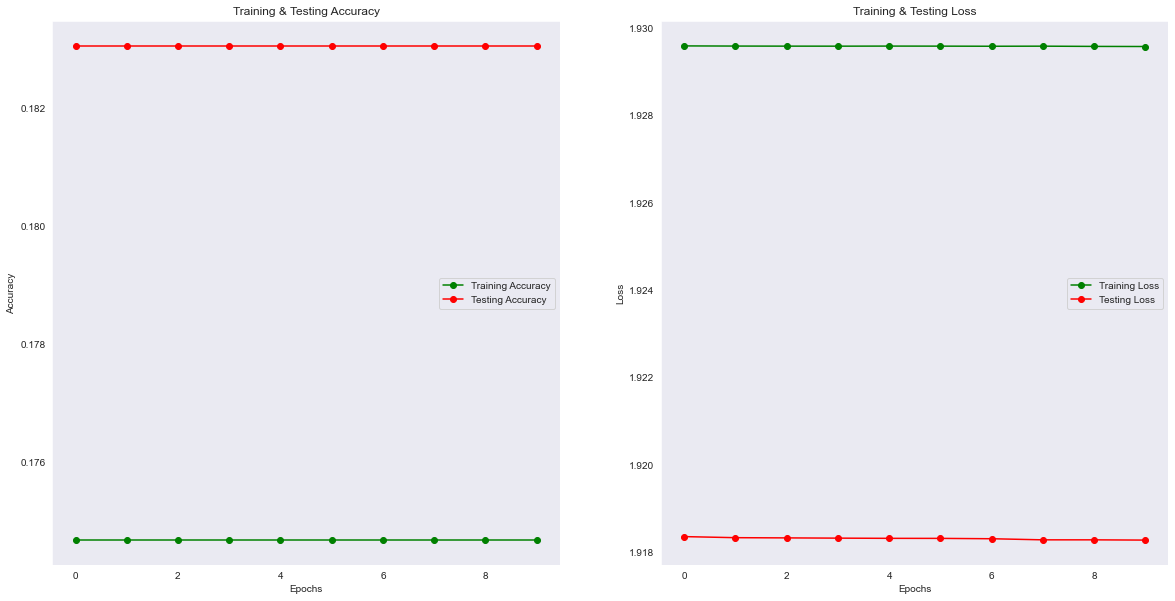

In [50]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [51]:
predictions = model.predict_classes(x_test)
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [52]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [53]:
print(classification_report(y_test_inv, predictions, target_names = labels))

              precision    recall  f1-score   support

        suzi       0.18      1.00      0.31        80
 moonchaewon       0.00      0.00      0.00        81
    jangnara       0.00      0.00      0.00        32
     boyoung       0.00      0.00      0.00        72
       Naeon       0.00      0.00      0.00        69
        emma       0.00      0.00      0.00        49
       jenny       0.00      0.00      0.00        54

    accuracy                           0.18       437
   macro avg       0.03      0.14      0.04       437
weighted avg       0.03      0.18      0.06       437



C:\Users\Lee Jong Ann\anaconda3\envs\second\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
cm = confusion_matrix(y_test_inv,predictions)
cm

array([[80,  0,  0,  0,  0,  0,  0],
       [81,  0,  0,  0,  0,  0,  0],
       [32,  0,  0,  0,  0,  0,  0],
       [72,  0,  0,  0,  0,  0,  0],
       [69,  0,  0,  0,  0,  0,  0],
       [49,  0,  0,  0,  0,  0,  0],
       [54,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [55]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

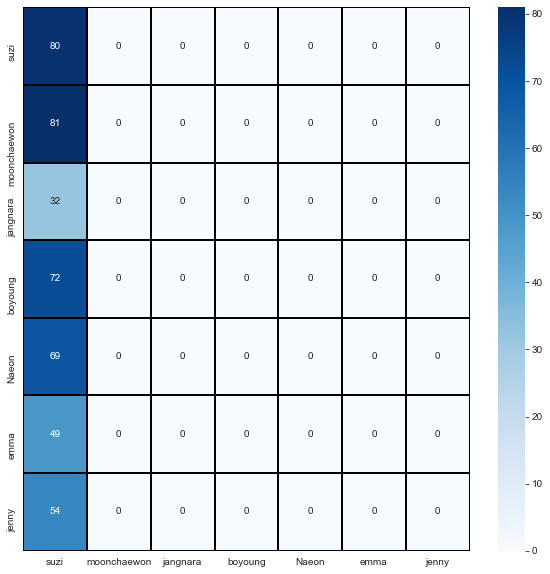

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [57]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

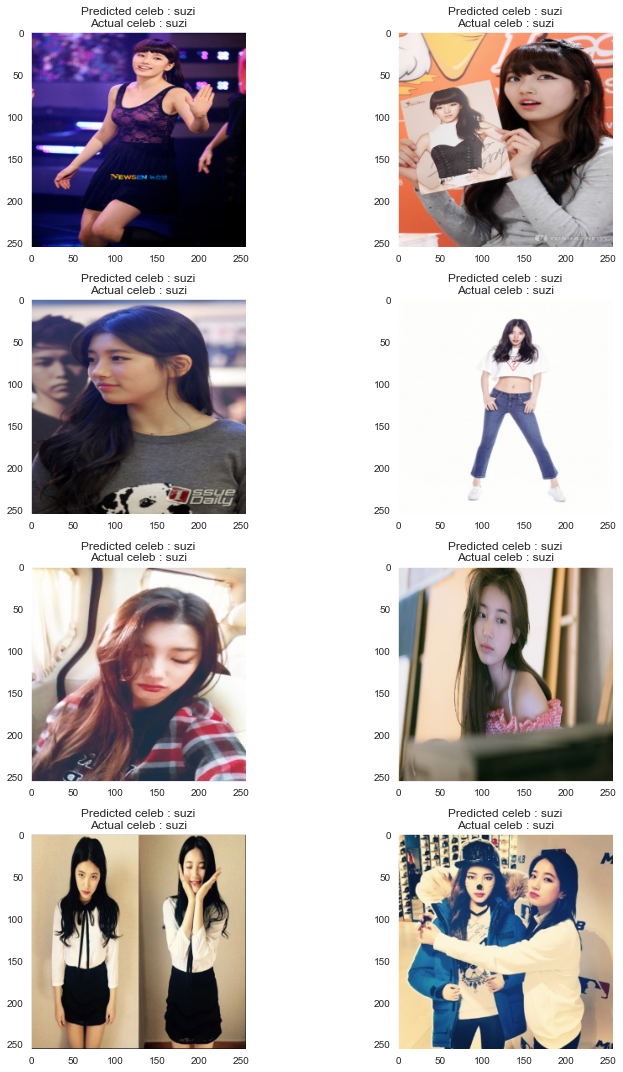

In [58]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted celeb : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual celeb : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

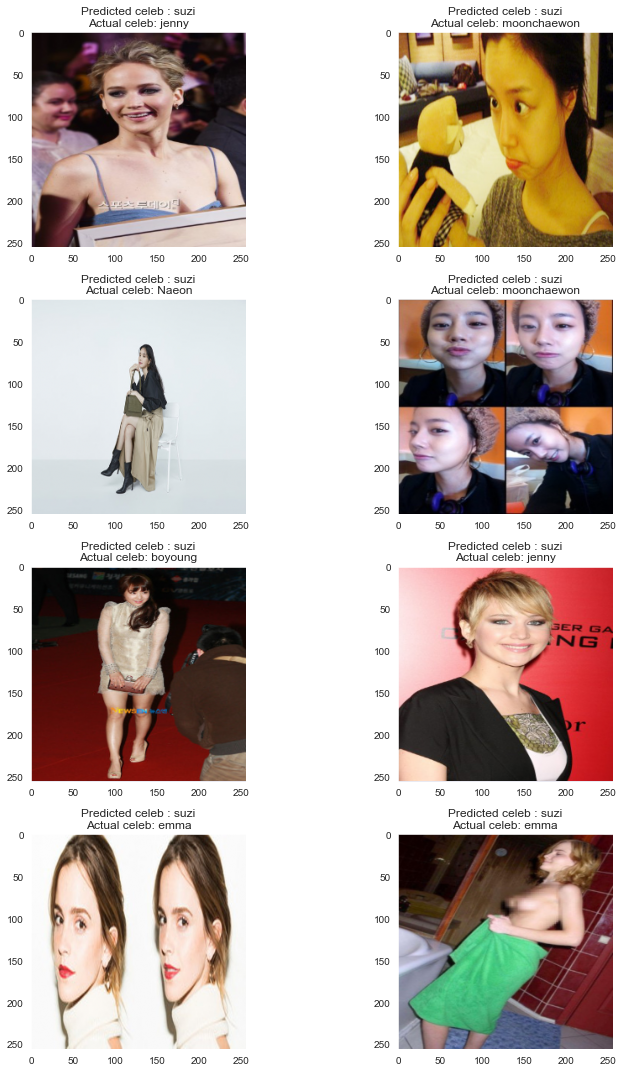

In [59]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted celeb : "+labels[predictions[mis_class[count]]]+"\n"+"Actual celeb: "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1